<a href="https://colab.research.google.com/github/Isabellitankian/FIAP-2022/blob/main/Usando_DecisionTree_and_MLPClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Começar importando os cavaleiros do apocalipse... 🏇



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import matplotlib as pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Carregar os dados:

In [ ]:
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target

In [ ]:
labels = np.reshape(breast_labels, (569, 1))

In [ ]:
final = np.concatenate( [breast_data, labels], axis=1 )
final.shape

(569, 31)

In [ ]:
colunas = list(breast.feature_names)
colunas.append("label")

df = pd.DataFrame(final, columns=colunas)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.nunique()

mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
label                        2
dtype: int64

In [ ]:
df["label"].unique()

array([0., 1.])

In [ ]:
def troca_label(x):
  if x == 0:
    return "Benígno"
  else:
    return "Malígno"

df["label2"] = df["label"].apply( troca_label )

In [ ]:
df.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label,label2
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0,Benígno
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0,Benígno
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0,Benígno
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0,Benígno
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0,Malígno


In [ ]:
df["label2"].value_counts()

Malígno    357
Benígno    212
Name: label2, dtype: int64

In [ ]:
del df["label"] 
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label2
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benígno
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benígno
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benígno
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benígno
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benígno


Diminuir o tamanho do dataset:

Padronização dos dados:

In [ ]:
dados = df.drop(columns=["label2"])
scaler = StandardScaler()
dados_scaled = scaler.fit_transform(dados)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


Aplicando o PCA:

In [ ]:
n_componentes=2
pca = PCA(n_componentes)
pca_breast = pca.fit_transform(dados_scaled)

df_pca = pd.DataFrame(pca_breast,
                      columns=[str(i+1)+"ª CP" for i in range(n_componentes)])
df_pca

,1ª CP,2ª CP
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [ ]:
pca_breast

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Explicabilidade de cada componente principal:

In [ ]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [ ]:
sum(pca.explained_variance_ratio_)

0.6324320765155946

## Usando a LogisticRegression:

Divisão de TREINO e TESTE:

In [ ]:
X = breast.data
y = breast.target

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.3,
                                                     random_state=42)

Criação, treinamento e avaliação do modelo:

In [ ]:
lr = LogisticRegression(max_iter=4000)
lr.fit(X_train, Y_train)


y_predict = lr.predict(X_test)

In [ ]:
print("Acurácia: ", metrics.accuracy_score(Y_test,y_predict ))

Acurácia:  0.9766081871345029


Avaliação do modelo:

In [ ]:
print(metrics.classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Usando um modelo de Classificação (classico) a Árvore de Decisão.

In [ ]:
#Divisão de treino e teste.
X_train, X_test, Y_train, Y_test = train_test_split(X,y, 
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
X_train.shape

(426, 30)

In [ ]:
X_test.shape

(143, 30)

In [ ]:
# Arvore 
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
tree.predict(X_test)
Y_pred_label = tree.predict(X_test)

In [ ]:
# Quais são as classes? 
tree.classes_

array([0, 1])

In [ ]:
# Quais são os labels preditos? 
Y_pred_label

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
# Qual a taxa de acerto? 
accuracy_score(Y_test, Y_pred_label)

0.9440559440559441

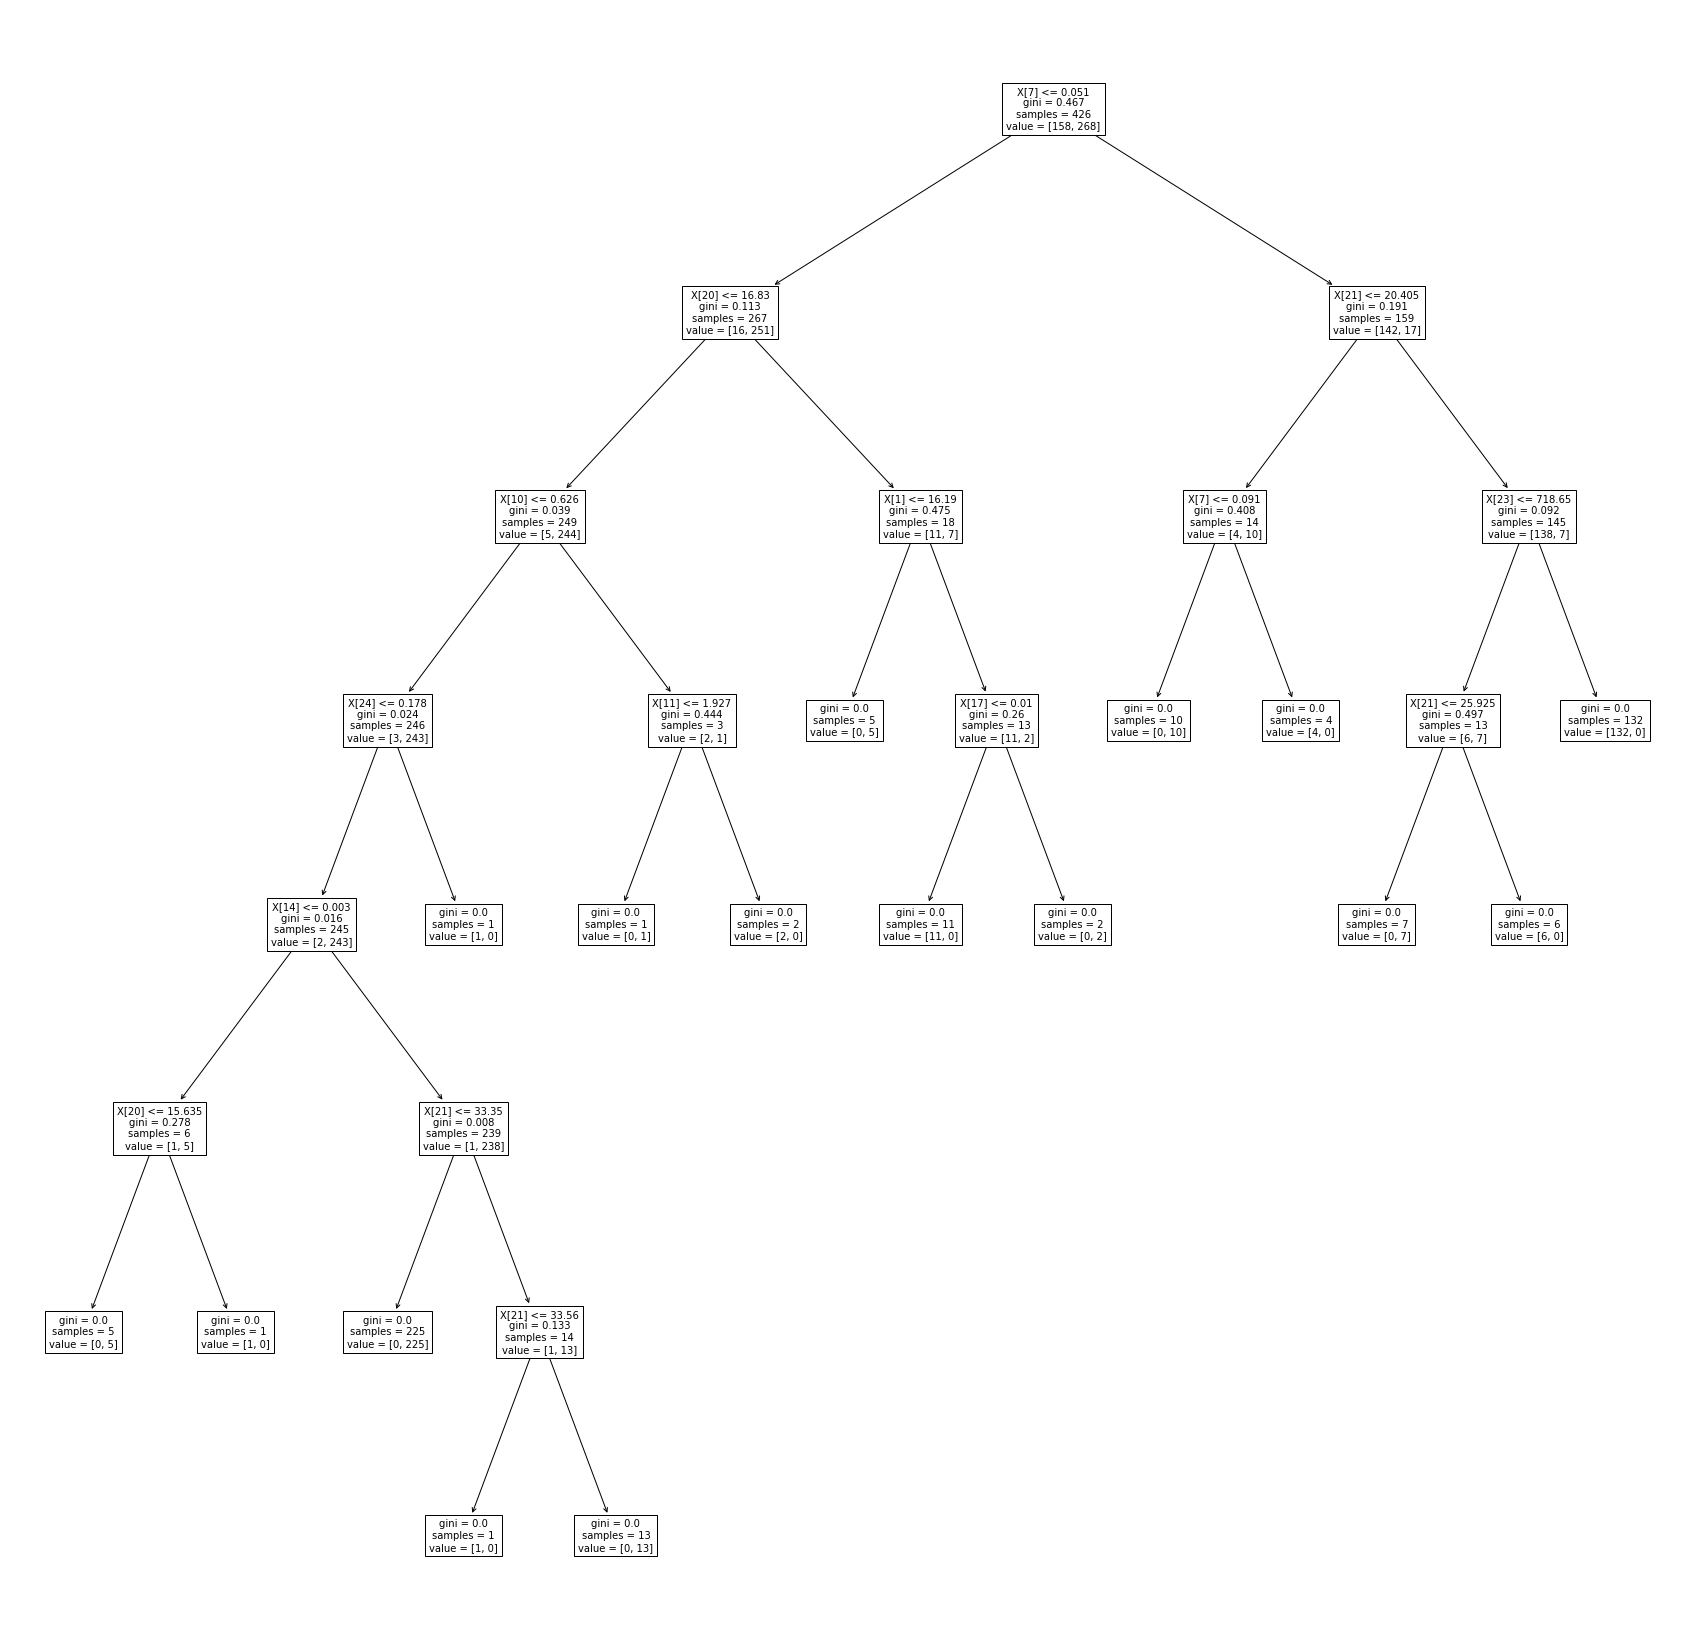

In [ ]:
# Podemos visualizar a árvore criada? 
plt.figure(figsize=(30,30))
plot_tree(tree, fontsize=10)
plt.show()

## Usando MLPClassifier :)

In [ ]:
X, y = make_classification(n_samples=100, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=1)

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

clf.predict(X_test[:5, :])

clf.score(X_test, y_test)

0.88

### Professor, achei díficil o entendimento desse CK. ☘

### Entretando, acredito que consegui satifazer todos os requisitos, usei o PCA, apliquei o modelo de Regressão Logística para construir o classificador, e usei outros 2 modelos de classificação, a Árvore de Decisão e o MLPClassifier. 

### Entretando, acredito que o modelo de Regressão Logistica ficou melhor para o entedimento final dos dados após o treino e teste. 